In [3]:
# Kết nối đến drive
from google.colab import drive
drive.mount('/content/drive')

#Thêm thư viên
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

Mounted at /content/drive


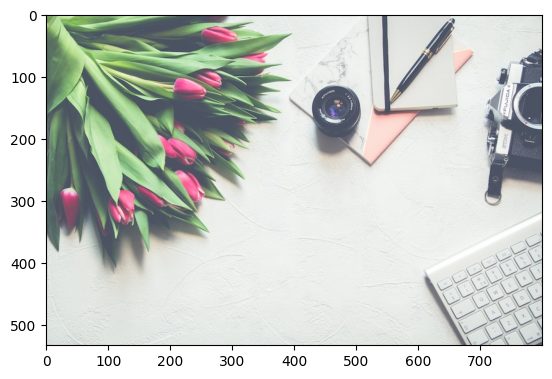

In [6]:
#Đọc ảnh từ Drive
img_ORG = plt.imread('/content/drive/MyDrive/XuLyAnh/TH1/TH1/Photo00001.jpg')
plt.imshow(img_ORG)

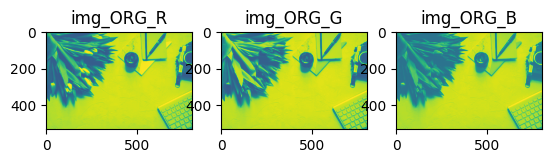

In [7]:
#3.Tách ảnh đã đọc thành 3 kênh màu
img_ORG_R = img_ORG[:,:, 0]
img_ORG_G = img_ORG[:,:, 1]
img_ORG_B = img_ORG[:,:, 2]

#Hiển thị
KhungKQ = plt
KhungKQ.subplots(nrows = 1,ncols = 3)
#red
KhungKQ.subplot(1,3,1)
KhungKQ.title('img_ORG_R')
KhungKQ.imshow(img_ORG_R)
#green
KhungKQ.subplot(1,3,2)
KhungKQ.title('img_ORG_G')
KhungKQ.imshow(img_ORG_G)
#blue
KhungKQ.subplot(1,3,3)
KhungKQ.title('img_ORG_B')
KhungKQ.imshow(img_ORG_B)


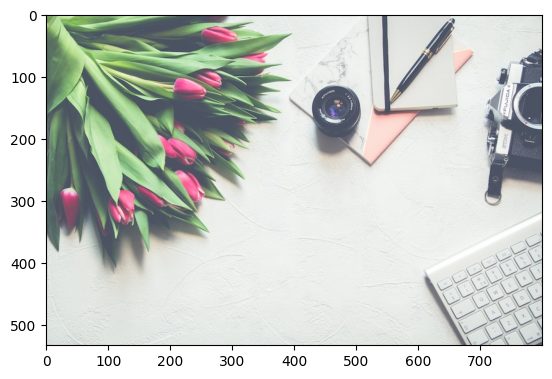

In [8]:
#4. Ghép 3 kênh màu lại thành 1 ảnh ban đầu
output1 = np.dstack((img_ORG_R,img_ORG_G,img_ORG_B))
plt.imshow(output1)

In [9]:
#5. Khai báo hàm XLA_linear
def XLA_linear(img, a=1, b = 0):
  kq = img.astype('float32')  #Chuyển kiểu hình ảnh từ unit8 thành float32
  kq = kq*a + b
  kq = kq.clip(0,255)         #Cắt hình ảnh giữa lại trong khoảng từ 0 - 255
  return kq.astype('uint8')


In [10]:
#6. Khai báo hàm XLA_to_grayscale
def XLA_to_grayscale(img):
  R = img[:, :,0]
  G = img[:, :,1]
  B = img[:, :,2]
  return (R*0.2989 + G*0.5870 + B*0.1140).clip(0,255).astype('uint8')

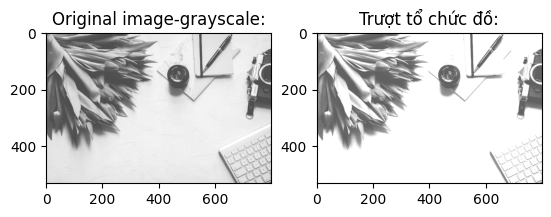

In [11]:
#7. Thực hiện trượt tổ chức đồ
plt.subplots(nrows = 1, ncols = 2)

plt.subplot(1,2,1)
plt.title('Original image-grayscale:')
output2 = XLA_to_grayscale(img_ORG)
plt.imshow(output2, cmap='gray')

plt.subplot(1,2,2)
plt.title('Trượt tổ chức đồ:')
plt.imshow(XLA_linear(output2,1,50), cmap='gray')

<BarContainer object of 256 artists>

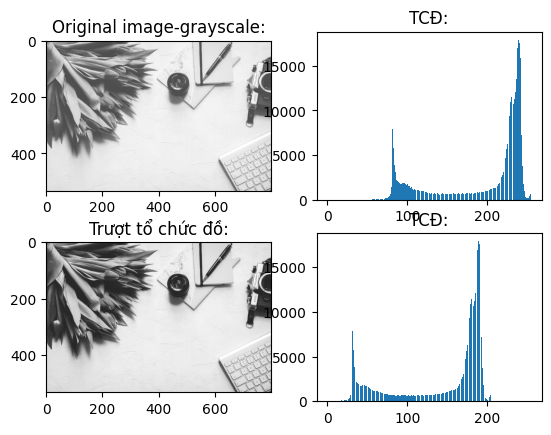

In [12]:
# --------------- Bài tập 1:
plt.subplots(nrows = 2, ncols = 2)

plt.subplot(2,2,1)
plt.title('Original image-grayscale:')
output2 = XLA_to_grayscale(img_ORG)
plt.imshow(output2, cmap='gray')

hist, bins = np.histogram(output2.ravel(), bins=256, range=(0,256))
plt.subplot(2,2,2)
plt.title('TCĐ:')
plt.bar(bins[:-1],hist)

plt.subplot(2,2,3)
plt.title('Trượt tổ chức đồ:')
output3 = XLA_linear(output2,1,-50)
plt.imshow(output3, cmap='gray')

plt.subplot(2,2,4)
plt.title('TCĐ:')
hist, bins = np.histogram(output3.ravel(), bins=256, range=(0,256))
plt.bar(bins[:-1],hist)

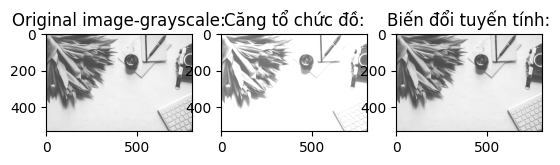

In [13]:
# -------------- bài tập 2
#Hàm biến đổi tuyến tính
def ThayDoiDoTuongPhan(img, c=1):
  kq = img.astype('float32')
  kq = kq*c
  kq = kq.clip(0,255)
  return kq.astype('uint8')

def BienDoiTuyenTinh(img):
  Max = img.max()
  Min = img.min()
  kq = img.astype('float32')
  kq = (255*(kq - Min))/(Max - Min)
  kq = kq.clip(0,255)
  return kq.astype('uint8')

#Hiển thị
plt.subplots(nrows = 1, ncols = 3)

plt.subplot(1,3,1)
plt.title('Original image-grayscale:')
output2 = XLA_to_grayscale(img_ORG)
plt.imshow(output2, cmap='gray')

plt.subplot(1,3,2)
plt.title('Căng tổ chức đồ:')
plt.imshow(ThayDoiDoTuongPhan(output2,1.5), cmap='gray')

plt.subplot(1,3,3)
plt.title('Biến đổi tuyến tính:')
plt.imshow(BienDoiTuyenTinh(output2), cmap='gray')


In [14]:
from scipy import signal
from skimage.filters import gaussian

<function matplotlib.pyplot.show(close=None, block=None)>

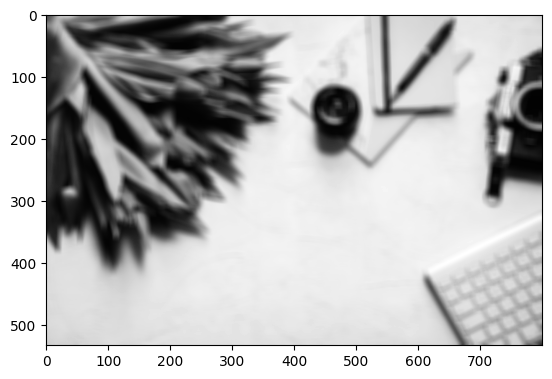

In [15]:
kernel = np.ones( (11,11), np.float32)/121
#Hàm signal.convolve2d để thực hiện phép tích chập trên mảng 2 chiều
img3 = signal.convolve2d( output2, kernel, boundary='symm', mode = 'same')# mode = 'same' Giữ nguyên kích cỡ hình ảnh sau khi tích chập, boundary='symm' Lấy đầy các giá trị mở rộng bằng các giá trị biên
plt.imshow(img3 ,cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

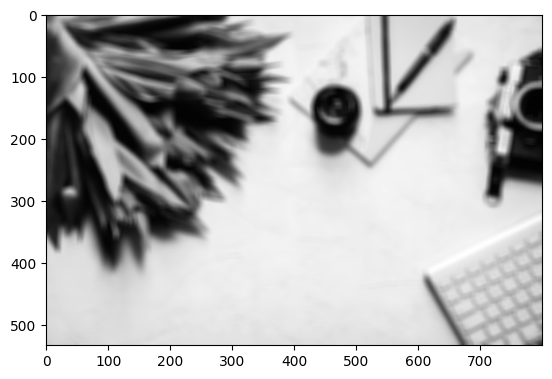

In [16]:
# ---------------------- Bài tập 3
BoxFilterKernel = np.ones((11,11) , dtype=np.float32)/2**11
img4 = signal.convolve2d( output2, BoxFilterKernel, boundary='symm', mode = 'same')# mode = 'same' Giữ nguyên kích cỡ hình ảnh sau khi tích chập, boundary='symm' Lấy đầy các giá trị mở rộng bằng các giá trị biên
plt.imshow(img4 ,cmap = 'gray')
plt.show



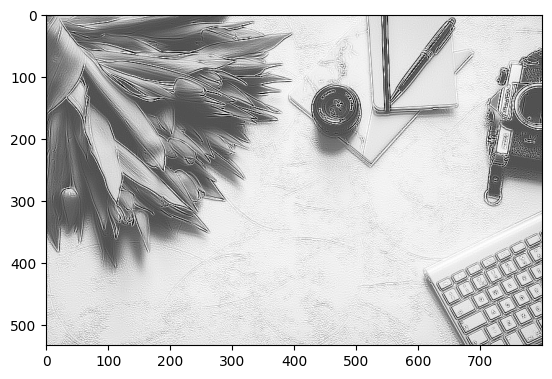

In [17]:
#Laplacian
def laplacian(img,c=1):
  M = np.array( [(1,1,1),(1,-8,1),(1,1,1)] ,dtype = np.float32)     #Bộ lọc
  #Tích chập ảnh góc với nhân
  SauKhiTichChapVoi_M = signal.convolve2d( img , M, boundary='symm', mode = 'same')

  kq1 = SauKhiTichChapVoi_M.astype('float32')
  anhGoc = img.astype('float32')

  AnhKetQua = anhGoc + kq1*c

  AnhKetQua = AnhKetQua.clip(0,255)
  return AnhKetQua.astype('uint8')

plt.imshow(laplacian(output2,1) ,cmap='gray')

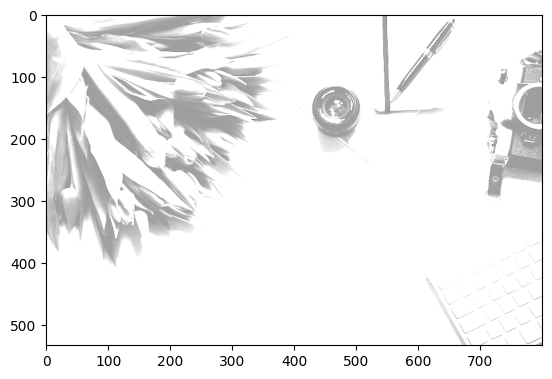

In [18]:
#Unsharp Mask
def UnsharpMask(img, k=1):
  #Tích chập ảnh góc với nhân gaussian
  SauKhiTichChap = gaussian(img,2)

  LamMoAnh = SauKhiTichChap.astype('float32')
  anhGoc = img.astype('float32')
  #2. tính unsharpmark
  unsharpmask = anhGoc - LamMoAnh
  #3.Tính ảnh kết quả
  anhKetQua = anhGoc + k*unsharpmask

  anhKetQua = anhKetQua.clip(0,255)
  return anhKetQua.astype('uint8')

plt.imshow(UnsharpMask(output2,1) ,cmap='gray')

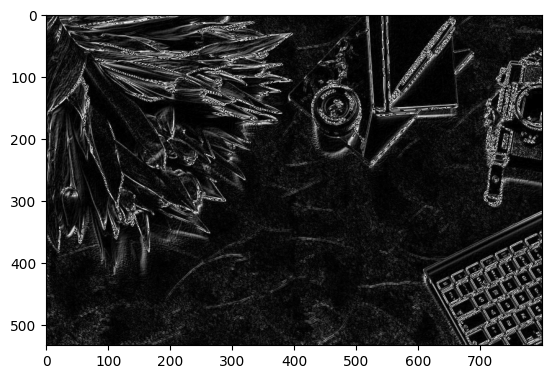

In [21]:
#Lấy đường biên
def LayDuongBien(img):
  #Bộ loc cho sẵn
  S1 = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
  S2 = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)

  #Tính tích chạp ảnh gốc với từng nhân bên trên
  F1 = signal.convolve2d( img , S1, boundary='symm', mode = 'same')
  F2 = signal.convolve2d( img , S2, boundary='symm', mode = 'same')

  F1 = F1.astype('float32')
  F2 = F2.astype('float32')

  #Ảnh kết quả
  AnhKQ = abs(F1+F2)
  return AnhKQ.astype('uint8')
plt.imshow(LayDuongBien(output2) ,cmap='gray')

<ipython-input-25-0c1e5792e25b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-25-0c1e5792e25b>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


<BarContainer object of 256 artists>

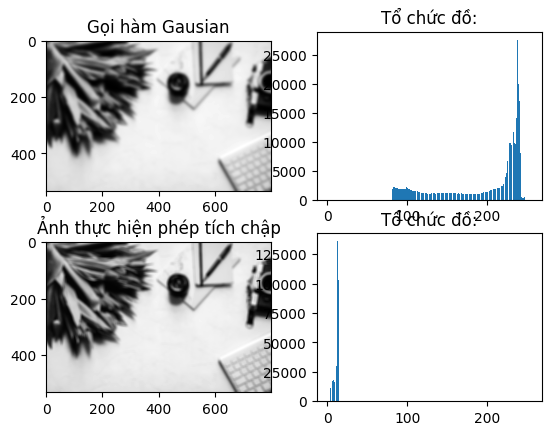

In [25]:
# -------------- Bài 4
plt.subplots(nrows = 1, ncols = 3)

kernelGaussian = gaussian(img3,sigma=3)
plt.subplot(2,2,1)
plt.title('Gọi hàm Gausian')
plt.imshow(kernelGaussian ,cmap = 'gray')


plt.subplot(2,2,2)
hist, bins = np.histogram(kernelGaussian, bins=256, range=(0,256))
plt.title("Tổ chức đồ:")
plt.bar(bins[:-1],hist)


plt.subplot(2,2,3)
plt.title('Ảnh thực hiện phép tích chập')
plt.imshow(img4 ,cmap = 'gray')

plt.subplot(2,2,4)
hist, bins = np.histogram(img4, bins=256, range=(0,256))
plt.title("Tổ chức đồ:")
plt.bar(bins[:-1],hist)

